In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get data
df = pd.read_csv('raw_data/horse_racing_raw.csv')

In [3]:
df.describe()

,id,f_id,f_distance,f_class,f_age,f_pace,f_weight,f_runners,pred_isp,f_rating_rbd,...,f_pm_05m,f_pm_03m,f_pm_02m,f_pm_01m,f_bsp_p_back,f_bsp_p_lay,f_pm_01m_p_back,f_pm_01m_p_lay,f_pm_15m_p_back,f_pm_15m_p_lay
count,3.453630e+05,3.453630e+05,345363.000000,247337.000000,345363.000000,345212.000000,345363.000000,345363.000000,345363.000000,344502.000000,...,340767.000000,340871.000000,340964.000000,341004.000000,344998.000000,344998.000000,344645.000000,344645.000000,339848.000000,339847.000000
mean,1.648365e+13,1.648365e+13,12.868388,4.317680,5.093218,5.035178,142.507822,11.503514,45.883198,95.513393,...,58.479765,59.565013,60.758887,66.468253,-0.073724,-0.014167,-0.074028,-0.051324,-0.058990,-0.067163
std,2.559315e+11,2.559315e+11,6.344272,1.356204,2.240577,2.532917,15.058073,4.204376,501.069928,43.232524,...,150.242091,152.067616,154.959000,167.738294,6.360134,6.681553,6.294554,6.891922,6.152988,6.739348
min,1.604279e+13,1.604279e+13,5.000000,1.000000,2.000000,0.000000,112.000000,2.000000,1.020000,7.000000,...,1.020000,1.020000,1.020000,1.010000,-1.000000,-999.000000,-1.000000,-1009.000000,-1.000000,-1009.000000
25%,1.626150e+13,1.626150e+13,7.000000,4.000000,3.000000,3.000000,130.000000,8.000000,6.000000,78.000000,...,6.800000,6.800000,6.800000,6.800000,-1.000000,0.950000,-1.000000,0.950000,-1.000000,0.950000
50%,1.649248e+13,1.649248e+13,11.500000,5.000000,5.000000,5.000000,138.000000,11.000000,11.000000,101.000000,...,14.000000,14.000000,14.000000,14.500000,-1.000000,0.950000,-1.000000,0.950000,-1.000000,0.950000
75%,1.669476e+13,1.669476e+13,17.500000,5.000000,6.000000,7.000000,156.000000,14.000000,21.000000,123.000000,...,36.000000,36.000000,36.000000,38.000000,-1.000000,0.950000,-1.000000,0.950000,-1.000000,0.950000
max,1.692554e+13,1.692554e+13,34.500000,6.000000,18.000000,10.000000,182.000000,40.000000,9999.000000,237.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,949.050000,0.950000,949.050000,0.950000,949.050000,0.950000


In [4]:
# Generate binary 'win' column

df['win'] = df['f_place'].apply(lambda x: 1 if x == 1 else 0)

In [5]:
df_subset = df[['id', 'f_id', 'f_ko', 'f_rating_rbd', 'f_rating_or', 'win', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset

,id,f_id,f_ko,f_rating_rbd,f_rating_or,win,f_pm_15m,f_pm_15m_p_back
0,16916847000316,16916847000002,2023-08-10 17:25:00,86.0,64.0,0,9.00,-1.00
1,16916953800243,16916953800013,2023-08-10 20:23:00,104.0,62.0,1,2.12,1.06
2,16916829000067,16916829000014,2023-08-10 16:55:00,82.0,53.0,0,5.50,-1.00
3,16916940000050,16916940000027,2023-08-10 20:00:00,126.0,79.0,0,NaN,NaN
4,16916835000195,16916835000029,2023-08-10 17:05:00,103.0,80.0,0,65.00,-1.00
...,...,...,...,...,...,...,...,...
345358,16913385000066,16913385000011,2023-08-06 17:15:00,119.0,84.0,0,4.10,-1.00
345359,16913385000144,16913385000011,2023-08-06 17:15:00,105.0,81.0,0,18.00,-1.00
345360,16913394000045,16913394000012,2023-08-06 17:30:00,141.0,0.0,0,32.00,-1.00
345361,16913394000091,16913394000012,2023-08-06 17:30:00,124.0,0.0,0,85.00,-1.00


In [6]:
# Generate columns for number of horses in race and convert odds to probabilities

df_subset['num_horses_in_race'] = df_subset.groupby('f_id')['f_id'].transform('count')
df_subset['f_pm_15m_proba'] = 1 / (df_subset['f_pm_15m'])
df_subset

,id,f_id,f_ko,f_rating_rbd,f_rating_or,win,f_pm_15m,f_pm_15m_p_back,num_horses_in_race,f_pm_15m_proba
0,16916847000316,16916847000002,2023-08-10 17:25:00,86.0,64.0,0,9.00,-1.00,9,0.111111
1,16916953800243,16916953800013,2023-08-10 20:23:00,104.0,62.0,1,2.12,1.06,11,0.471698
2,16916829000067,16916829000014,2023-08-10 16:55:00,82.0,53.0,0,5.50,-1.00,9,0.181818
3,16916940000050,16916940000027,2023-08-10 20:00:00,126.0,79.0,0,NaN,NaN,8,NaN
4,16916835000195,16916835000029,2023-08-10 17:05:00,103.0,80.0,0,65.00,-1.00,7,0.015385
...,...,...,...,...,...,...,...,...,...,...
345358,16913385000066,16913385000011,2023-08-06 17:15:00,119.0,84.0,0,4.10,-1.00,11,0.243902
345359,16913385000144,16913385000011,2023-08-06 17:15:00,105.0,81.0,0,18.00,-1.00,11,0.055556
345360,16913394000045,16913394000012,2023-08-06 17:30:00,141.0,0.0,0,32.00,-1.00,8,0.031250
345361,16913394000091,16913394000012,2023-08-06 17:30:00,124.0,0.0,0,85.00,-1.00,8,0.011765


In [7]:
# Create test set over last year of dataset.

test_start_date = '2022-08-20 18:45:00'  # max_date - 1 yr

# Split the data
train = df_subset[df_subset['f_ko'] <= test_start_date]
test = df_subset[df_subset['f_ko'] > test_start_date]

len(train), len(test)

(224994, 120369)

In [8]:
# Drop rows with a NaN OR value for logreg to work

test1 = test.dropna(subset=['f_rating_or'])
test1

,id,f_id,f_ko,f_rating_rbd,f_rating_or,win,f_pm_15m,f_pm_15m_p_back,num_horses_in_race,f_pm_15m_proba
0,16916847000316,16916847000002,2023-08-10 17:25:00,86.0,64.0,0,9.00,-1.00,9,0.111111
1,16916953800243,16916953800013,2023-08-10 20:23:00,104.0,62.0,1,2.12,1.06,11,0.471698
2,16916829000067,16916829000014,2023-08-10 16:55:00,82.0,53.0,0,5.50,-1.00,9,0.181818
3,16916940000050,16916940000027,2023-08-10 20:00:00,126.0,79.0,0,NaN,NaN,8,NaN
4,16916835000195,16916835000029,2023-08-10 17:05:00,103.0,80.0,0,65.00,-1.00,7,0.015385
...,...,...,...,...,...,...,...,...,...,...
345358,16913385000066,16913385000011,2023-08-06 17:15:00,119.0,84.0,0,4.10,-1.00,11,0.243902
345359,16913385000144,16913385000011,2023-08-06 17:15:00,105.0,81.0,0,18.00,-1.00,11,0.055556
345360,16913394000045,16913394000012,2023-08-06 17:30:00,141.0,0.0,0,32.00,-1.00,8,0.031250
345361,16913394000091,16913394000012,2023-08-06 17:30:00,124.0,0.0,0,85.00,-1.00,8,0.011765


In [9]:
# Create X and y

X_train = train[['f_rating_or', 'num_horses_in_race']]
y_train = train['win']
X_test = test1[['f_rating_or', 'num_horses_in_race']]
y_test = test1['win']

In [10]:
# Fit logreg to training data

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [11]:
# Predict win probabilities for test data
probabilities = clf.predict_proba(X_test)

# The second column of 'probabilities' contains the probabilities of a win
win_probabilities = probabilities[:, 1]

print(win_probabilities)

[0.12028585 0.09757482 0.11696285 ... 0.11302826 0.11302826 0.1020496 ]


In [12]:
test1['predict_proba'] = win_probabilities
test1['proba_difference'] = test1['predict_proba'] - test1['f_pm_15m_proba']
test1.head()

,id,f_id,f_ko,f_rating_rbd,f_rating_or,win,f_pm_15m,f_pm_15m_p_back,num_horses_in_race,f_pm_15m_proba,predict_proba,proba_difference
0,16916847000316,16916847000002,2023-08-10 17:25:00,86.0,64.0,0,9.00,-1.00,9,0.111111,0.120286,0.009175
1,16916953800243,16916953800013,2023-08-10 20:23:00,104.0,62.0,1,2.12,1.06,11,0.471698,0.097575,-0.374123
2,16916829000067,16916829000014,2023-08-10 16:55:00,82.0,53.0,0,5.50,-1.00,9,0.181818,0.116963,-0.064855
3,16916940000050,16916940000027,2023-08-10 20:00:00,126.0,79.0,0,NaN,NaN,8,NaN,0.138012,NaN
4,16916835000195,16916835000029,2023-08-10 17:05:00,103.0,80.0,0,65.00,-1.00,7,0.015385,0.152577,0.137192


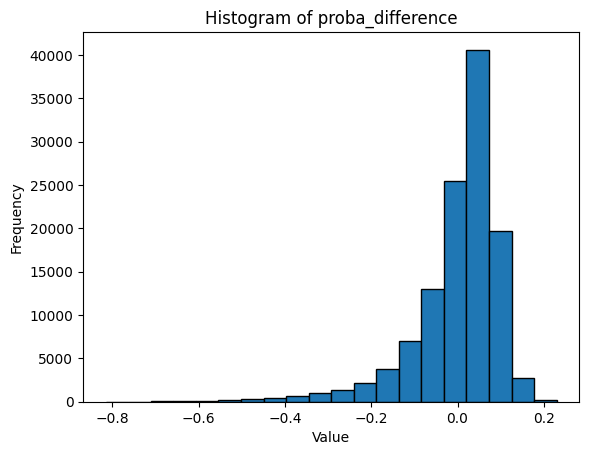

In [13]:
# Look at distribution of proba_difference

plt.hist(test1['proba_difference'], bins=20, edgecolor='black')
plt.title("Histogram of proba_difference")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Create dataframes of horses above specific proba_difference thresholds

horses_above_5_threshold = test1[test1['proba_difference'] > 0.05]
horses_above_10_threshold = test1[test1['proba_difference'] > 0.1]
horses_above_11_threshold = test1[test1['proba_difference'] > 0.11]
horses_above_12_threshold = test1[test1['proba_difference'] > 0.12]
horses_above_13_threshold = test1[test1['proba_difference'] > 0.13]
horses_above_14_threshold = test1[test1['proba_difference'] > 0.14]
horses_above_15_threshold = test1[test1['proba_difference'] > 0.15]

In [15]:
# Calculate evolutions of profits for each threshold

df5 = horses_above_5_threshold.sort_values(by='f_ko')
df_subset5 = df5[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset5['cumulative_profit'] = df_subset5['f_pm_15m_p_back'].cumsum()
df_subset5['cumulative_profit_100'] = df_subset5['cumulative_profit'] * 100

df10 = horses_above_10_threshold.sort_values(by='f_ko')
df_subset10 = df10[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset10['cumulative_profit'] = df_subset10['f_pm_15m_p_back'].cumsum()
df_subset10['cumulative_profit_100'] = df_subset10['cumulative_profit'] * 100

df11 = horses_above_11_threshold.sort_values(by='f_ko')
df_subset11 = df11[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset11['cumulative_profit'] = df_subset11['f_pm_15m_p_back'].cumsum()
df_subset11['cumulative_profit_100'] = df_subset11['cumulative_profit'] * 100

df12 = horses_above_12_threshold.sort_values(by='f_ko')
df_subset12 = df12[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset12['cumulative_profit'] = df_subset12['f_pm_15m_p_back'].cumsum()
df_subset12['cumulative_profit_100'] = df_subset12['cumulative_profit'] * 100

df13 = horses_above_13_threshold.sort_values(by='f_ko')
df_subset13 = df13[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset13['cumulative_profit'] = df_subset13['f_pm_15m_p_back'].cumsum()
df_subset13['cumulative_profit_100'] = df_subset13['cumulative_profit'] * 100

df14 = horses_above_14_threshold.sort_values(by='f_ko')
df_subset14 = df14[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset14['cumulative_profit'] = df_subset14['f_pm_15m_p_back'].cumsum()
df_subset14['cumulative_profit_100'] = df_subset14['cumulative_profit'] * 100

df15 = horses_above_15_threshold.sort_values(by='f_ko')
df_subset15 = df15[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]
df_subset15['cumulative_profit'] = df_subset15['f_pm_15m_p_back'].cumsum()
df_subset15['cumulative_profit_100'] = df_subset15['cumulative_profit'] * 100

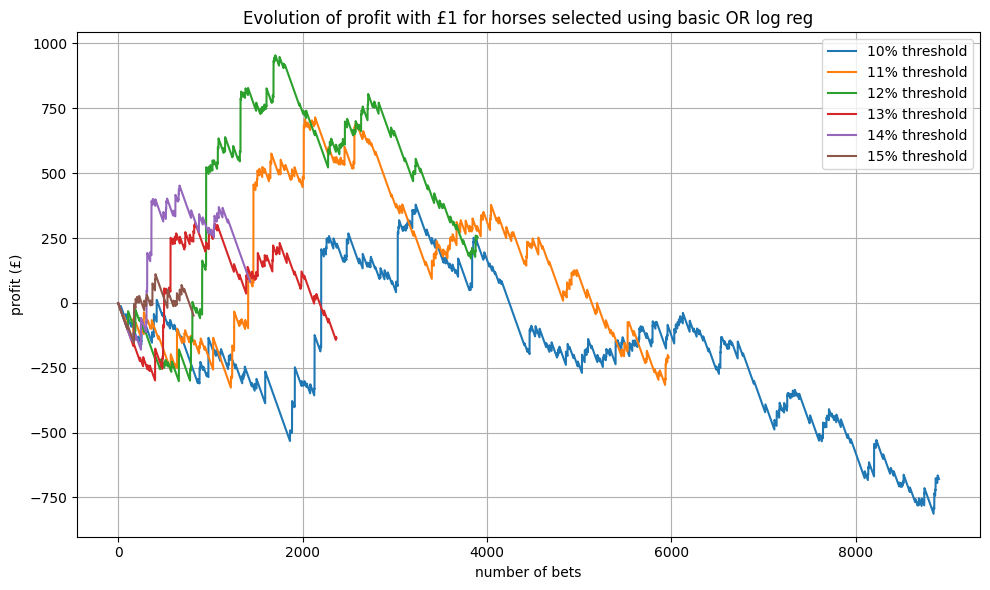

In [16]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(df_subset10) + 1), df_subset10['cumulative_profit'], label='10% threshold')
plt.plot(range(1, len(df_subset11) + 1), df_subset11['cumulative_profit'], label='11% threshold')
plt.plot(range(1, len(df_subset12) + 1), df_subset12['cumulative_profit'], label='12% threshold')
plt.plot(range(1, len(df_subset13) + 1), df_subset13['cumulative_profit'], label='13% threshold')
plt.plot(range(1, len(df_subset14) + 1), df_subset14['cumulative_profit'], label='14% threshold')
plt.plot(range(1, len(df_subset15) + 1), df_subset15['cumulative_profit'], label='15% threshold')
#plt.plot(range(1, len(df_subset5) + 1), df_subset5['cumulative_profit'], label='5% threshold')

plt.title("Evolution of profit with £1 for horses selected using basic OR log reg")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

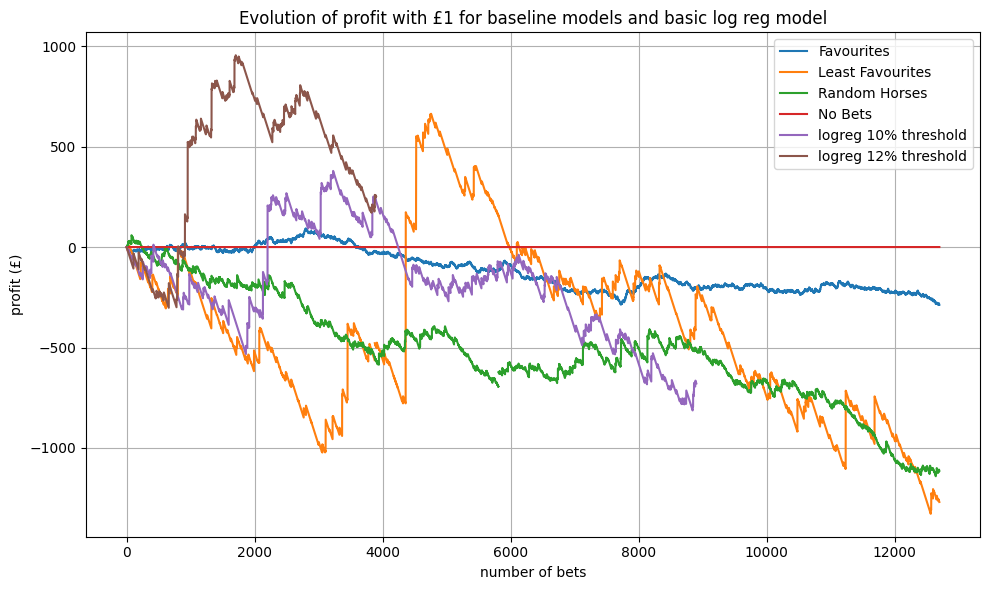

In [17]:
# Plot all baseline models in one graph

data = test.sort_values(by='f_ko')

# Select required columns
data_subset = data[['f_id', 'f_ko', 'f_pm_15m', 'f_pm_15m_p_back']]

# For favourites
data_sorted = data_subset.sort_values(by=['f_id', 'f_pm_15m'])
data_favorites = data_sorted.groupby('f_id').first()
data_favorites['cumulative_profit'] = data_favorites['f_pm_15m_p_back'].cumsum()
data_favorites['cumulative_profit_100'] = data_favorites['cumulative_profit'] * 100

#For least favourites
data_sorted = data_subset.sort_values(by=['f_id', 'f_pm_15m'])
data_least_favorites = data_sorted.groupby('f_id').last()
data_least_favorites['cumulative_profit'] = data_least_favorites['f_pm_15m_p_back'].cumsum()
data_least_favorites['cumulative_profit_100'] = data_least_favorites['cumulative_profit'] * 100

# For random horses
data_random_horses = data_subset.groupby('f_id').apply(lambda x: x.sample(n=1)).reset_index(drop=True)
data_random_horses['cumulative_profit'] = data_random_horses['f_pm_15m_p_back'].cumsum()
data_random_horses['cumulative_profit_100'] = data_random_horses['cumulative_profit'] * 100

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(data_favorites) + 1), data_favorites['cumulative_profit'], label='Favourites')
plt.plot(range(1, len(data_least_favorites) + 1), data_least_favorites['cumulative_profit'], label='Least Favourites')
plt.plot(range(1, len(data_random_horses) + 1), data_random_horses['cumulative_profit'], label='Random Horses')
plt.plot(range(1, len(data_favorites) + 1), [0] * (len(data_favorites)), label='No Bets')
plt.plot(range(1, len(df_subset10) + 1), df_subset10['cumulative_profit'], label='logreg 10% threshold')
# plt.plot(range(1, len(df_subset11) + 1), df_subset11['cumulative_profit'], label='logreg 11% threshold')
plt.plot(range(1, len(df_subset12) + 1), df_subset12['cumulative_profit'], label='logreg 12% threshold')
# plt.plot(range(1, len(df_subset13) + 1), df_subset13['cumulative_profit'], label='logreg 13% threshold')
# plt.plot(range(1, len(df_subset14) + 1), df_subset14['cumulative_profit'], label='logreg 14% threshold')
# plt.plot(range(1, len(df_subset15) + 1), df_subset15['cumulative_profit'], label='logreg 15% threshold')

plt.title("Evolution of profit with £1 for baseline models and basic log reg model")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()